# pQTL

**Created**: 23 February 2022

## Environment

In [70]:
if (!requireNamespace("patchwork")) {
    install.packages("devtools")
    devtools::install_github("thomasp85/patchwork")
}

In [71]:
library(tidyverse)
library(patchwork)

setwd("~/eQTL_pQTL_Characterization/")

source("02_pQTL_Mapping/scripts/utils/ggplot_theme.R")

## Load Data

In [29]:
cis.pqtl <- readRDS("~/gains_team282/proteomics/pqtl/pqtl_ms2019/cis_pqtl_all.RDS")

In [30]:
head(cis.pqtl)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,Gene
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs10891965,11,116338864,-0.02160071,0.01689043,-1.278873,0.20140605,P02647,ENSG00000118137
2,rs567681,11,116345996,-0.01926185,0.01447882,-1.330347,0.18369312,P02647,ENSG00000118137
3,rs558659,11,116346042,-0.01926185,0.01447882,-1.330347,0.18369312,P02647,ENSG00000118137
4,rs545657,11,116346092,-0.01926185,0.01447882,-1.330347,0.18369312,P02647,ENSG00000118137
5,rs2581477,11,116348151,-0.02786340,0.01503605,-1.853107,0.06409621,P02647,ENSG00000118137
6,rs693448,11,116348209,-0.02786340,0.01503605,-1.853107,0.06409621,P02647,ENSG00000118137


In [31]:
sig.pgenes <- unique(cis.pqtl$pQTL_Protein[cis.pqtl$pQTL_pval < (5e-8) / 269])
sig.cis.pqtl <- cis.pqtl %>%
    dplyr::filter(pQTL_Protein %in% sig.pgenes)

In [32]:
head(sig.cis.pqtl)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,Gene
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs204546,19,44443013,-0.20933351,0.10324755,-2.0274912,0.04279872,P55056,ENSG00000267467
2,rs45610138,19,44443030,-0.01086963,0.05253575,-0.2068996,0.83611954,P55056,ENSG00000267467
3,rs2571169,19,44443260,0.11198700,0.04949895,2.2624119,0.02378217,P55056,ENSG00000267467
4,rs56384811,19,44443353,-0.01004896,0.05252762,-0.1913081,0.84831322,P55056,ENSG00000267467
5,rs204545,19,44443403,-0.20767159,0.10318576,-2.0125993,0.04434554,P55056,ENSG00000267467
6,rs57290748,19,44444237,0.03545964,0.03376937,1.0500535,0.29404599,P55056,ENSG00000267467


In [33]:
trans.pqtl <- readRDS("~/gains_team282/proteomics/pqtl/pqtl_ms2019/trans_pqtl_all.RDS")

In [34]:
head(trans.pqtl)

,SNP,Chr,Position,pQTL_beta,pQTL_SE,pQTL_t,pQTL_pval,pQTL_Protein,pQTL_Locus
,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,rs9934692,16,71510253,0.010479104,0.01809904,0.5789869,0.562729059,P19827,pQTL_1
2,rs111249146,16,71510918,-0.041639606,0.01294203,-3.2173933,0.001325316,P19827,pQTL_1
3,rs62056193,16,71510984,0.008473081,0.01831346,0.4626695,0.643685059,P19827,pQTL_1
4,rs11647749,16,71511125,-0.041639606,0.01294203,-3.2173933,0.001325316,P19827,pQTL_1
5,rs7202662,16,71511585,-0.041697479,0.01294720,-3.2205794,0.001310807,P19827,pQTL_1
6,rs7184543,16,71511728,-0.028114483,0.01185299,-2.3719321,0.017802872,P19827,pQTL_1


In [35]:
metadata <- read.table("~/gains_team282/nikhil/colocalization/eQTL_pQTL_metadata.tsv", sep="\t", header=TRUE)

In [36]:
head(metadata)

,Protein,Accession,Entry.Name,Gene.Names,Protein.Length,Coverage,Protein.Existence,Description,UniProt_ID,Gene_ID,⋯,feature,start,end,score,strand,frame,gene_id,gene_name,gene_biotype,tss
,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,sp|A0A075B6I9|LV746_HUMAN,A0A075B6I9,LV746_HUMAN,IGLV7-46,117,76.9,3:Protein inferred from homology,Immunoglobulin lambda variable 7-46,A0A075B6I9,ENSG00000211649,⋯,gene,22369614,22370087,.,+,.,ENSG00000211649,IGLV7-46,IG_V_gene,22369614
2,sp|A0A075B6P5|KV228_HUMAN,A0A075B6P5,KV228_HUMAN,IGKV2-28,120,100.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-28,A0A075B6P5,ENSG00000244116,⋯,gene,89221698,89222461,.,-,.,ENSG00000244116,IGKV2-28,IG_V_gene,89222461
3,sp|A0A075B6P5|KV228_HUMAN,A0A075B6P5,KV228_HUMAN,IGKV2-28,120,100.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-28,A0A075B6P5,ENSG00000282025,⋯,,NA,NA,,,,,,,NA
4,sp|A0A087WSY6|KVD15_HUMAN,A0A087WSY6,KVD15_HUMAN,IGKV3D-15,115,96.5,3:Protein inferred from homology,Immunoglobulin kappa variable 3D-15,A0A087WSY6,ENSG00000224041,⋯,gene,90114838,90115402,.,+,.,ENSG00000224041,IGKV3D-15,IG_V_gene,90114838
5,sp|A0A087WW87|KV240_HUMAN,A0A087WW87,KV240_HUMAN,IGKV2-40,121,81.0,3:Protein inferred from homology,Immunoglobulin kappa variable 2-40,A0A087WW87,ENSG00000273962,⋯,gene,89330110,89330429,.,-,.,ENSG00000273962,IGKV2-40,IG_V_gene,89330429
6,sp|A0A0B4J1V0|HV315_HUMAN,A0A0B4J1V0,HV315_HUMAN,IGHV3-15,119,84.0,3:Protein inferred from homology,Immunoglobulin heavy variable 3-15,A0A0B4J1V0,ENSG00000282290,⋯,,NA,NA,,,,,,,NA


## Visualize Significant cis-pQTL

Overall, we tested 269 proteins for the presence of pQTL. I use a Bonferroni FWER of $p < \frac{5\times 10^{-8}}{269}$. There are 23 *cis*-pQTL detected in the cohort.

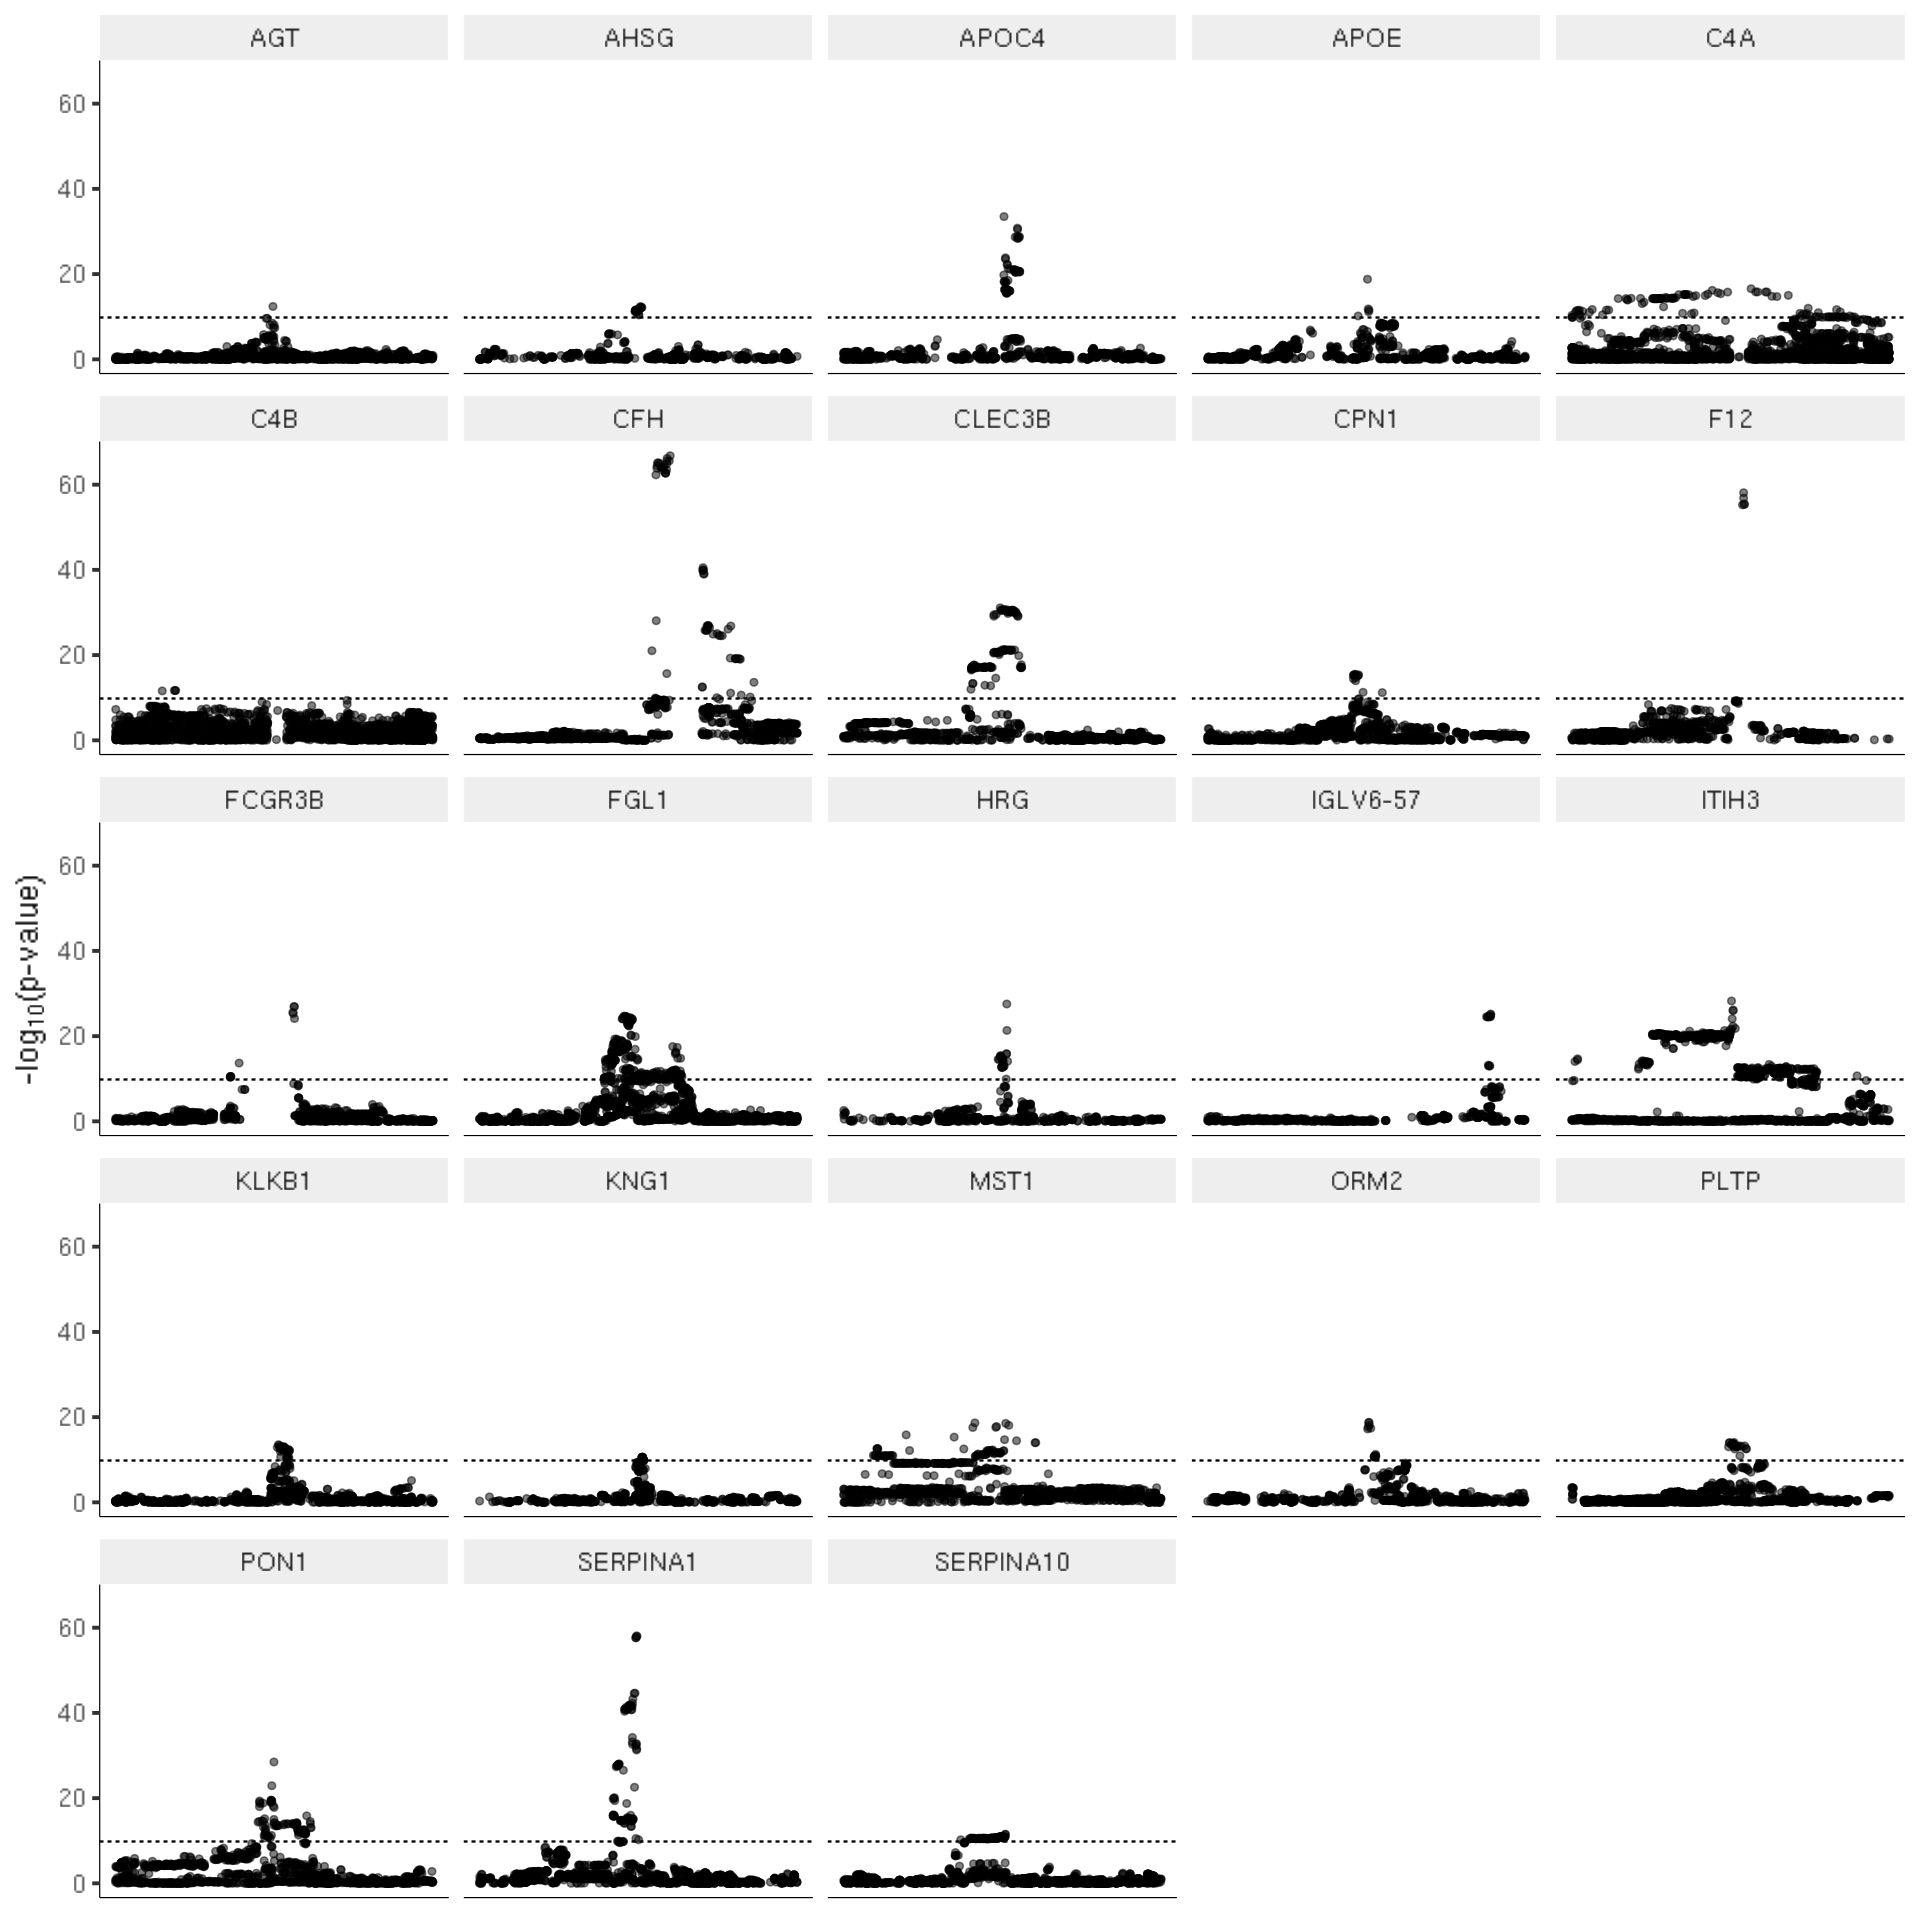

In [76]:
options(repr.plot.width=16, repr.plot.height=16)

sig.cis.pqtl %>%
    merge(., metadata, by.x="Gene", by.y="Gene_ID") %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(pQTL_pval)), alpha=0.5) +
    geom_hline(aes(yintercept=-log10(5e-8 / 269)), lty=2) +
    facet_wrap(.~Gene.Names, scales="free_x") +
    ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

ggsave("02_pQTL_Mapping/results/cis.pqtl.assoc.plots.png", width=16, height=16, dpi=600)

## Visualize Significant trans-pQTL

Overall, we tested 269 proteins for the presence of pQTL. I use a Bonferroni FWER of $p < \frac{5\times 10^{-8}}{269}$. There are 6 *trans*-pQTL detected in the cohort.

In [78]:
metadata.gene.names <- metadata %>%
    dplyr::select(Accession, Gene.Names) %>%
    unique()

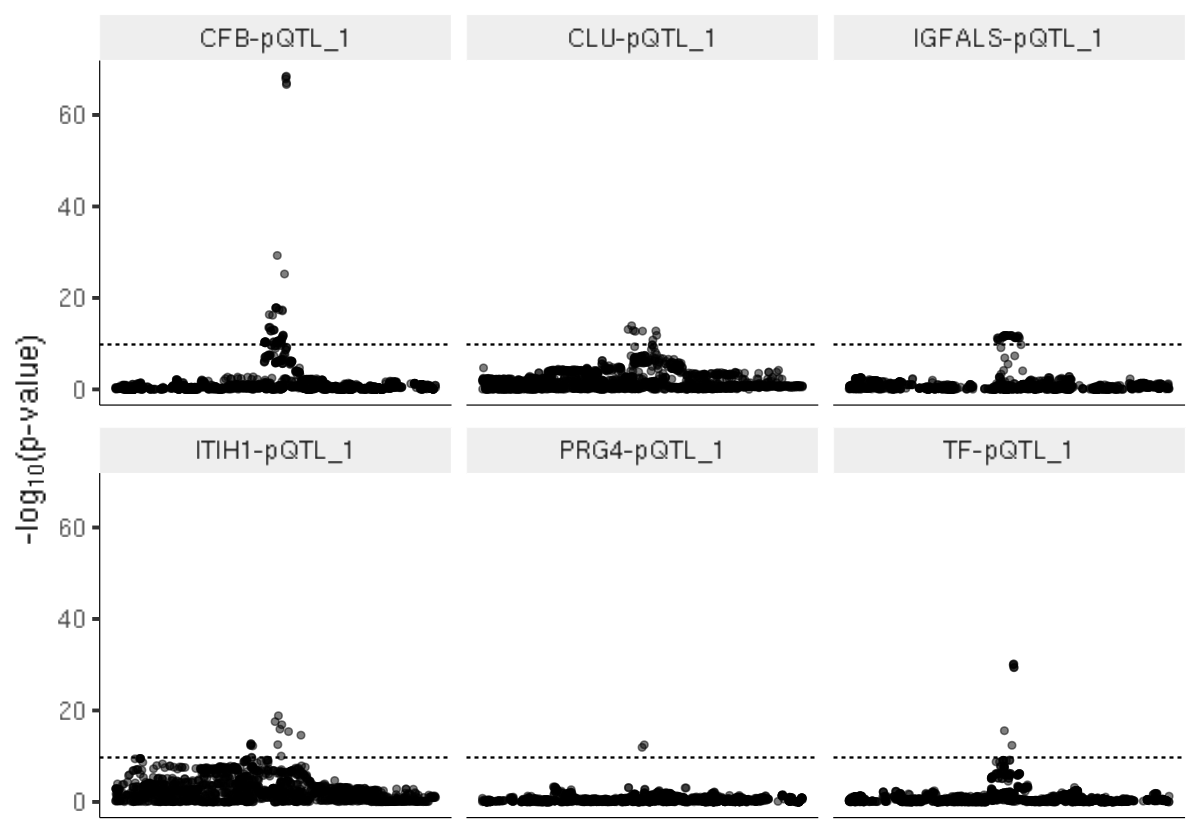

In [79]:
options(repr.plot.width=10, repr.plot.height=7)

trans.pqtl %>%
    merge(., metadata.gene.names, by.x="pQTL_Protein", by.y="Accession") %>%
    dplyr::mutate(pQTL_ID=paste0(Gene.Names, "-", pQTL_Locus)) %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(pQTL_pval)), alpha=0.5) +
    geom_hline(aes(yintercept=-log10(5e-8 / 269)), lty=2) +
    facet_wrap(.~pQTL_ID, scales="free_x") +
    ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

ggsave("02_pQTL_Mapping/results/trans.pqtl.assoc.plots.png", width=10, height=7, dpi=600)

Some of these *trans*-pQTL are in the same region. Is it worth colocalising these loci? I check by plotting the association plots together.

In [80]:
trans.pqtl %>%
    merge(., metadata.gene.names, by.x="pQTL_Protein", by.y="Accession") %>%
    dplyr::mutate(pQTL_ID=paste0(Gene.Names, "-", pQTL_Locus)) %>%
    dplyr::group_by(pQTL_ID, Chr) %>%
    dplyr::summarize(Mean.Position=mean(Position))

`summarise()` has grouped output by 'pQTL_ID'. You can override using the `.groups` argument.


pQTL_ID,Chr,Mean.Position
<chr>,<int>,<dbl>
CFB-pQTL_1,14,94342026
CLU-pQTL_1,16,72075529
IGFALS-pQTL_1,8,95454550
ITIH1-pQTL_1,16,72048821
PRG4-pQTL_1,14,94401061
TF-pQTL_1,14,94363058


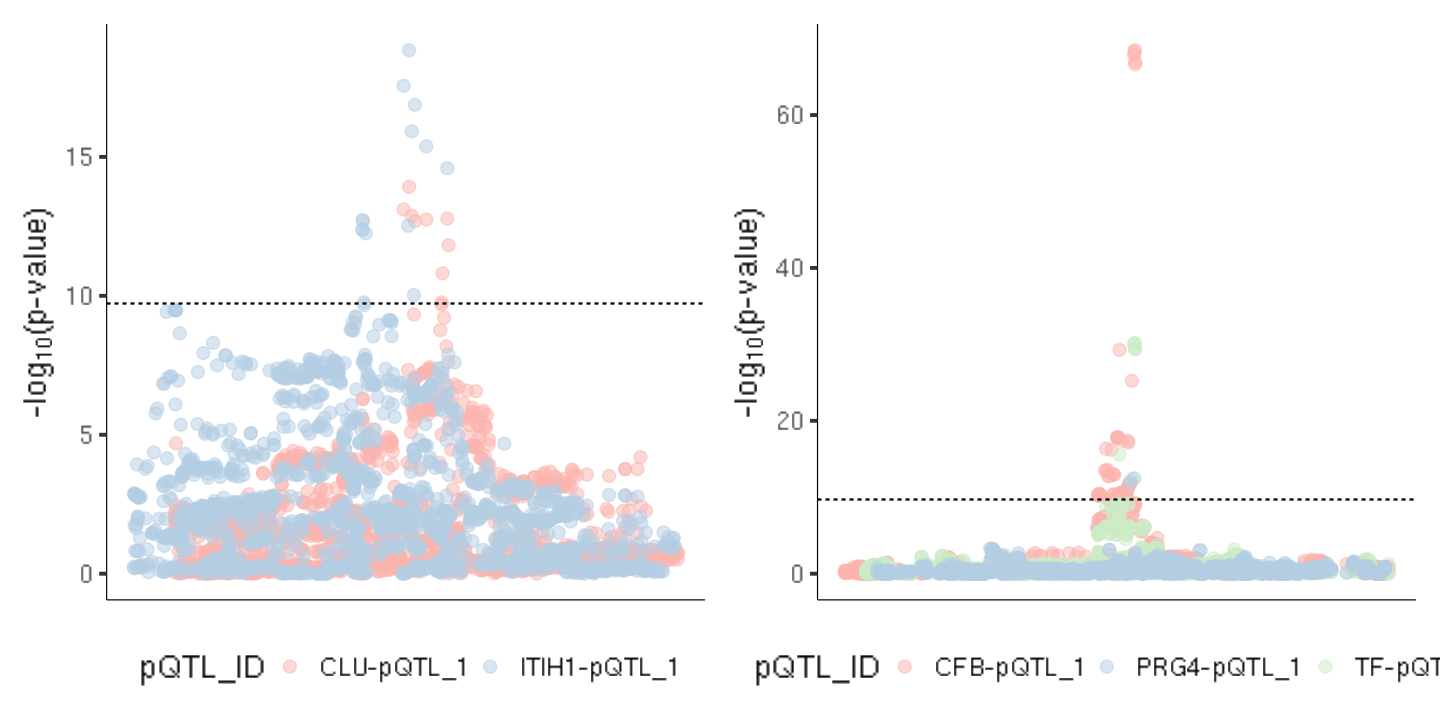

In [81]:
options(repr.plot.width=12, repr.plot.height=6)

p1 <- trans.pqtl %>%
    merge(., metadata.gene.names, by.x="pQTL_Protein", by.y="Accession") %>%
    dplyr::mutate(pQTL_ID=paste0(Gene.Names, "-", pQTL_Locus)) %>%
    dplyr::filter(pQTL_ID %in% c("CLU-pQTL_1", "ITIH1-pQTL_1")) %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(pQTL_pval), color=pQTL_ID), alpha=0.5, size=I(3)) +
    geom_hline(aes(yintercept=-log10(5e-8 / 269)), lty=2) +
    scale_color_brewer(palette="Pastel1") +
    ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

p2 <- trans.pqtl %>%
    merge(., metadata.gene.names, by.x="pQTL_Protein", by.y="Accession") %>%
    dplyr::mutate(pQTL_ID=paste0(Gene.Names, "-", pQTL_Locus)) %>%
    dplyr::filter(pQTL_ID %in% c("CFB-pQTL_1", "PRG4-pQTL_1", "TF-pQTL_1")) %>%
    ggplot() +
    geom_point(aes(x=Position, y=-log10(pQTL_pval), color=pQTL_ID), alpha=0.5, size=I(3)) +
    geom_hline(aes(yintercept=-log10(5e-8 / 269)), lty=2) +
    scale_color_brewer(palette="Pastel1") +
    ylab(bquote("-log"[10]*"(p-value)")) +
    ggplot_theme +
    theme(axis.title.x=element_blank(), axis.text.x=element_blank(), axis.ticks.x=element_blank())

p1 + p2

ggsave("02_pQTL_Mapping/results/trans.pqtl.overlap.assoc.plots.png", width=12, height=6)